# UTILS

In [2]:
import numpy as np

In [5]:
def get_indexes(matrices):
  p = []
  p.append(matrices[0].shape[0])
  for matrix in matrices:
    p.append(matrix.shape[1])
  return p

# MATRIX-CHAIN-ORDER ALGORITHM

In [8]:
def matrix_chain_order(p):
  n = len(p) - 1
  m = np.zeros((n+1,n+1))
  s = np.zeros((n+1,n+1))

  for l in range(2,n+1): # l é o offset com relação a diagonal principal
    for i in range( 1 , n - l + 2): #( n - l + 2, o 2 é para corrigir a posição inicial de arrays do python (0) com o do cormen (1))
      j = i + l - 1   # i + l - 1 calcula a celula atual na atual diagonal 
      m[i,j] = float('inf')
      for k in range(i,j):
        q = m[i,k] + m[k+1,j] + p[i-1]*p[k]*p[j]
        if q < m[i,j]:
          m[i,j] = q
          s[i,j] = k
  return m, s

In [9]:
# Exemplo do cormen

matrices = []
matrices.append(np.random.randint(2, size=(30,35)))
matrices.append(np.random.randint(2, size=(35,15)))
matrices.append(np.random.randint(2, size=(15,5)))
matrices.append(np.random.randint(2, size=(5,10)))
matrices.append(np.random.randint(2, size=(10,20)))
matrices.append(np.random.randint(2, size=(20,25)))

p = get_indexes(matrices)
m, s = matrix_chain_order(p)
print('Número min de multiplicações:')
print(m)
print('\nColocação dos parênteses:')
print(s)

Número min de multiplicações:
[[    0.     0.     0.     0.     0.     0.     0.]
 [    0.     0. 15750.  7875.  9375. 11875. 15125.]
 [    0.     0.     0.  2625.  4375.  7125. 10500.]
 [    0.     0.     0.     0.   750.  2500.  5375.]
 [    0.     0.     0.     0.     0.  1000.  3500.]
 [    0.     0.     0.     0.     0.     0.  5000.]
 [    0.     0.     0.     0.     0.     0.     0.]]

Colocação dos parênteses:
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 3. 3. 3.]
 [0. 0. 0. 2. 3. 3. 3.]
 [0. 0. 0. 0. 3. 3. 3.]
 [0. 0. 0. 0. 0. 4. 5.]
 [0. 0. 0. 0. 0. 0. 5.]
 [0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
# Exemplo do slide

matrices = []
matrices.append(np.random.randint(2, size=(10,100)))
matrices.append(np.random.randint(2, size=(100,5)))
matrices.append(np.random.randint(2, size=(5,50)))

p = get_indexes(matrices)
m, s = matrix_chain_order(p)
print('Número min de multiplicações:')
print(m)
print('\nColocação dos parênteses:')
print(s)

Número min de multiplicações:
[[    0.     0.     0.     0.]
 [    0.     0.  5000.  7500.]
 [    0.     0.     0. 25000.]
 [    0.     0.     0.     0.]]

Colocação dos parênteses:
[[0. 0. 0. 0.]
 [0. 0. 1. 2.]
 [0. 0. 0. 2.]
 [0. 0. 0. 0.]]


# CUTTING ROD ALGORITHMS

## SEM MEMOIZATION

In [15]:
def cut_rod(p,n):
  if n == 0:
    return 0
  q = float('-inf')
  for i in range(1,n+1):
    q = max(q, p[i] + cut_rod(p,n-i))
  return q

In [28]:
#nesta implementação, precisamos garantir que a lista de precos tenha 0 na posiçao 0 do array
prices = [0,5,6,2,4,5,6,2,4]
rod_length = 7
print("solucao otima:")
print(cut_rod(prices, rod_length))

solucao otima:
35


## COM MEMOIZATION


In [25]:
def memo_cut_rod(p,n,r):
    if r[n] >= 0:
        return r[n]
    if n == 0:
        q = 0
    else:
        q = float('-inf')
        for i in range(1,n+1):
            q = max(q, p[i] + memo_cut_rod(p,n-i,r))
    r[n] = q
    return q

In [29]:
#nesta implementação, precisamos garantir que a lista de precos tenha 0 na posiçao 0 do array
prices = [0,5,6,2,4,5,6,2,4]
memoization = np.full(len(prices),float('-inf'))
rod_length = 7
print("solucao otima:")
print(memo_cut_rod(prices, rod_length, memoization))

solucao otima:
35


# 1º


1º) Considerar uma modificação no problema do "corte da Haste", no qual em adição ao preço $p_i$ de cada haste de tamanho $i$, cada corte executado incorre em um custo fixo $c$. A receita associada com a solução do problema é agora a soma do preços dos pedaços menos os custos para realizar os respectivos cortes. Escreva um algoritmos de programação dinâmica para resolver este novo problema do corte da haste, qual o custo em tempo deste novo algoritmo?

Resposta:

Para modificar o algoritmo cut-rod de modo a considerar que cada corte possui um custo basta adicionar a linha que calcula o custo da haste atual a subtração do custo do corte ($p_i + r_{r-i} - cost$). Como a estrutura do algoritmo não muda, como pode ser observado nos algoritmos top-down e bottom-up implementados abaixo, e a linha modificada tem custo 1, então o custo do novo algoritmo permanece sendo $\Theta(n^2)$.

## TOP-DOWN

In [35]:
def memoization_cut_rod_cut_cost_top_down_aux(p, n, r, cost, where_to_cut):
    if r[n] > 0:
        return r[n]
    if n == 0:
        q = 0  
    else:
        q = r[n]
        for i in range(1,n+1):
          aux = p[i] + memoization_cut_rod_cut_cost_top_down_aux(p,n-i,r,cost, where_to_cut) - cost
          if q < aux:
            q = aux
            where_to_cut[n] = i # lista da posicao dos cortes
    r[n] = q
    return q

def memoization_cut_rod_cut_cost_top_down(prices, rod_lenght, cut_cost):
  memoization = np.full(len(prices),0)
  where_to_cut = np.full(rod_length + 1, 0)
  return memoization_cut_rod_cut_cost_top_down_aux(prices, rod_length, memoization, cut_cost, where_to_cut), where_to_cut

In [41]:
prices = [0, 1, 5, 8, 10, 13, 17, 17, 20, 24, 30]
rod_length = 10
cut_cost = 3

revenue, cuts = memoization_cut_rod_cut_cost_top_down(prices, rod_length, cut_cost)
print('prices: {}\nrod length: {}\ncut cost: {}\nrevenue: {}\ncuts: {}'.format(prices,rod_length,cut_cost,revenue, cuts))

prices: [0, 1, 5, 8, 10, 13, 17, 17, 20, 24, 30]
rod length: 10
cut cost: 3
revenue: 27
cuts: [ 0  0  2  3  4  5  6  6  8  9 10]


## BOTTOM-UP

In [38]:
def memoization_cut_rod_cut_cost_bottom_up(p, n, cost):
    r = np.full(n+1, 0)
    where_to_cut = np.full(n + 1, 0)
    r[0] = 0
    for j in range(1, n+1):
        q = r[j]
        for i in range(1, j+1):
          aux = p[i] + r[j - i] - cost
          if q < aux:
            q = aux
            where_to_cut[j] = i
        r[j] = q
    return r, where_to_cut

In [42]:
prices = [0, 1, 5, 8, 10, 13, 17, 17, 20, 24, 30]
rod_length = 10
cut_cost = 3
revenue, cuts = memoization_cut_rod_cut_cost_bottom_up(prices, rod_length, cut_cost)
print('prices: {}\nrod length: {}\ncut cost: {}\nrevenue: {}\ncuts: {}'.format(prices,rod_length,cut_cost,revenue, cuts))

prices: [0, 1, 5, 8, 10, 13, 17, 17, 20, 24, 30]
rod length: 10
cut cost: 3
revenue: [ 0  0  2  5  7 10 14 14 17 21 27]
cuts: [ 0  0  2  3  4  5  6  6  8  9 10]


# 2º

2º) Escreva um algoritmo recursivo $MATRIX-CHAIN-MULTIPLY(A,s,i,j)$ que desempenhe a multiplicação ótima, dando-se a sequência de matrizes $<A_1,A_2,...,A_n>$, a tabela $s$ computada por MATRIX-CHAIN-ORDER e os índices $i$ e $j$. (A chamada inicial poderia ser $MATRIX-CHAIN-MULTIPLY(A,s,1,n)$)

## MATRIX−CHAIN−MULTIPLY ALGORITHM

In [10]:
def matrix_chain_multiply(matrices, s, i, j): # s representa a memoização para colocacao dos parenteses
  if i == j:
    return matrices[i-1]
  else:
    m1 = matrix_chain_multiply(matrices, s, i, int(s[i,j]) )
    m2 = matrix_chain_multiply(matrices, s, int(s[i,j]) + 1 , j)
    return np.matmul(m1, m2)

In [12]:
n = len(p) - 1
r = matrix_chain_multiply(matrices, s, 1, n)

print('dimensões da matrix resultante:')
r.shape

dimensões da matrix resultante:


(30, 25)

# 3º

3º) Seja $R(i,j)$ o número de vezes que uma entrada na tabela $m[i,j]$ é referenciada enquanto realiza-se a computação de outras entradas da tabela m na chamada do procedimento $MATRIX-CHAIN-ORDER$. Mostre que o número total de referências para a tabela $m$ completa é:

$\sum_{i=1}^{n} \sum_{j=1}^{n} R(i,j) = \frac{n^3-n}{3}$

Resposta:

Levando em consideração o custo dos laços **for**, pois os mesmos contêm a execução dos acessos a tabela $m$, e as duas referência a tabela $m$ (linha 10 do algoritmo matrix-chain-order do cormen), temos que o número total de referências pode ser calculado pela equação abaixo:

$R(i,j) = \sum_{l=2}^{n}\sum_{i=1}^{n-l+1}\sum_{k=1}^{i+l-2}2$

$ = \sum_{l=2}^{n}\sum_{i=1}^{n-l+1}2(i+l-1)$

$ = \sum_{l=2}^{n}\sum_{i=1}^{n-l+1}2(l-1)$

$ = \sum_{l=2}^{n}2(l-1)(n-l+1)$

seja $p = l-1$, então o limite superior ($l=n$) fica $p = n-1$ e o limite inferior ($l=2$) fica $p = 2 - 1 = 1$.

$ = \sum_{p=1}^{n-1}2p(n-p)$

$ = 2\sum_{p=1}^{n-1}pn-p^2$

$ = 2\sum_{p=1}^{n-1}pn-2\sum_{p=1}^{n-1}p^2$

$ = 2\frac{n^2(n-1)}{2}-2\frac{2n^3-3n^2+n}{6}$

$ = n^3-n^2-\frac{2n^3-3n^2+n}{3}$

$ = \frac{3n^3-3n^2-2n^3+3n^2-n}{3}$

$ = \frac{n^3-n}{3}$








# 4º

4º) Esboce a árvore de recursividade para a algoritmo _Merge-Sort_ (seção 2.3.1 do livro texto) para um arranjo numérico com 16 elementos. Explique por que a memoização falha no processo na acelaração de um bom algoritmo de dividir para conquistar como é _Merge-Sort_.

Resposta: 

A memoização é uma técnica de otimização que armazena cálculos numa dada execução, para que caso a mesma execução surga novamente ela não precisar ser cálculada, basta buscar o resultado armazenado anteriormente. Essa técnica é amplamente utilizada em programação dinâmica, onde podem surgir repetições do mesmo subproblema durante a execução de um algoritmo. Desta forma, a memoização permite a economia de processamento por meio da busca de subproblemas já calculados em memória. Ou seja, esta técnica é útil em algoritmos que ocorrem a repetição de subproblemas. Como no merge-sort os subproblemas não se repetem, então os dados salvos pela memoization nunca seriam utilizados, resultando apenas num custo adicional de memória e mantendo o desse algoritmo, $O(n^2)$.

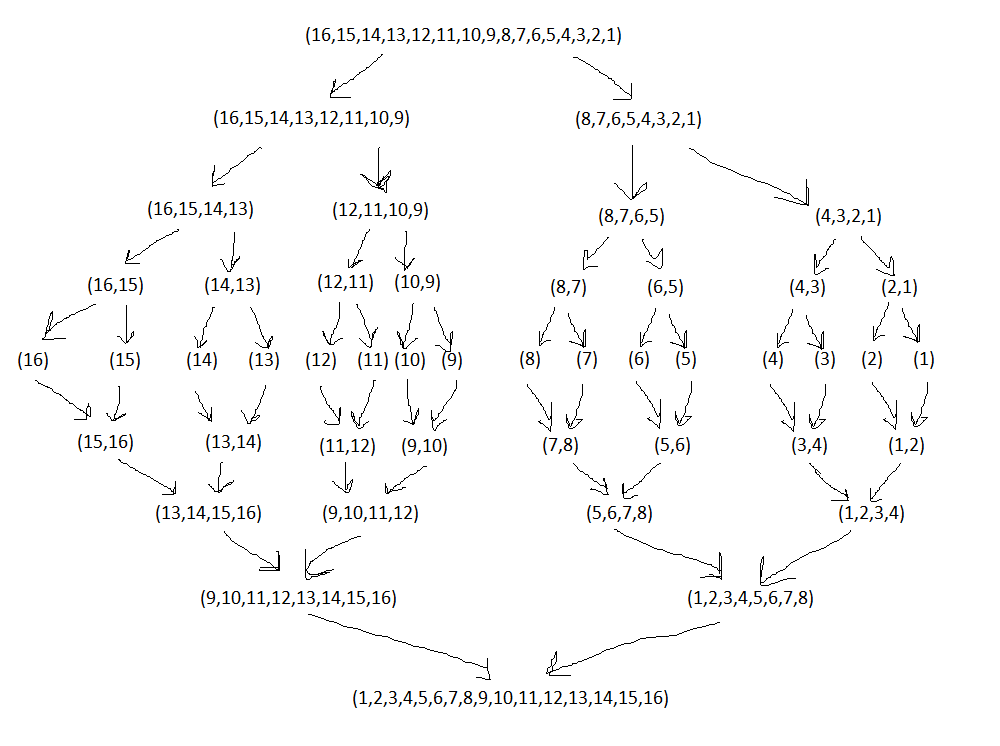

# 5º

5º) Considere uma variação do problema da Multiplicação da Sequência de Matrizes, no qual é desejado definir a ordem de multiplicação entre as matrizes tal que o número de multiplicações escalares seja maximizado, ao invés de minimizado. Este problema exibe uma substrutura ótima? Comente sua resposta

Resposta:

O algorimo matrix-chain-order utiliza possui subestrutura ótima para resolver o problema. No processo recursivo do problema, a subestrutura ótima de um dado subproblema é encontrada por meio da busca do arrajo de matrizes que retornam o menor custo. De forma semelhante, também podemos observar essa sub-estrutura ótima no problema da maximização do custo, onde só precisamos buscar o arranjo de maior custo para resolver o problema original. A versão modificada do algoritmo matrix-chain-order para maximizar o custo pode ser encontrada abaixo.

## MATRIX-CHAIN-ORDER-MAX

In [ ]:
def matrix_chain_order_max(p):
  n = len(p) - 1
  m = np.zeros((n+1,n+1))
  s = np.zeros((n+1,n+1))

  for l in range(2,n+1):
    for i in range( 1 , n - l + 2): # n - l + 2, o 2 é para corrigir a posição inicial de arrays do python (0) com o do cormen (1)
      j = i + l - 1 
      m[i,j] = float('-inf')
      for k in range(i,j):
        q = m[i,k] + m[k+1,j] + p[i-1]*p[k]*p[j]
        if q > m[i,j]:
          m[i,j] = q
          s[i,j] = k
  return m, s

In [ ]:
# Exemplo do cormen

matrices = []
matrices.append(np.random.randint(2, size=(10,100)))
matrices.append(np.random.randint(2, size=(100,5)))
matrices.append(np.random.randint(2, size=(5,50)))

p = get_indexes(matrices)
m, s = matrix_chain_order_max(p)
print('Número max de multiplicações:')
print(m)
print('\nColocação dos parênteses:')
print(s)

Número max de multiplicações:
[[    0.     0.     0.     0.]
 [    0.     0.  5000. 75000.]
 [    0.     0.     0. 25000.]
 [    0.     0.     0.     0.]]

Colocação dos parênteses:
[[0. 0. 0. 0.]
 [0. 0. 1. 1.]
 [0. 0. 0. 2.]
 [0. 0. 0. 0.]]
